In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import os
import random

In [3]:
label_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [4]:
weights = "Faster_RCNN_Opencv\gfrozen_inference_graph.pb"
config = "Faster_RCNN_Opencv\mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

In [5]:
net = cv2.dnn.readNetFromTensorflow(weights, config)

Image  1
Coordinates:  128 227 327 535
Class:  dog

Coordinates:  119 97 586 450
Class:  bicycle

Coordinates:  471 80 699 173
Class:  car

Image  2
Coordinates:  124 93 343 253
Class:  dog

Coordinates:  252 137 391 226
Class:  dog

Coordinates:  366 112 502 288
Class:  cat

Coordinates:  0 0 586 341
Class:  car



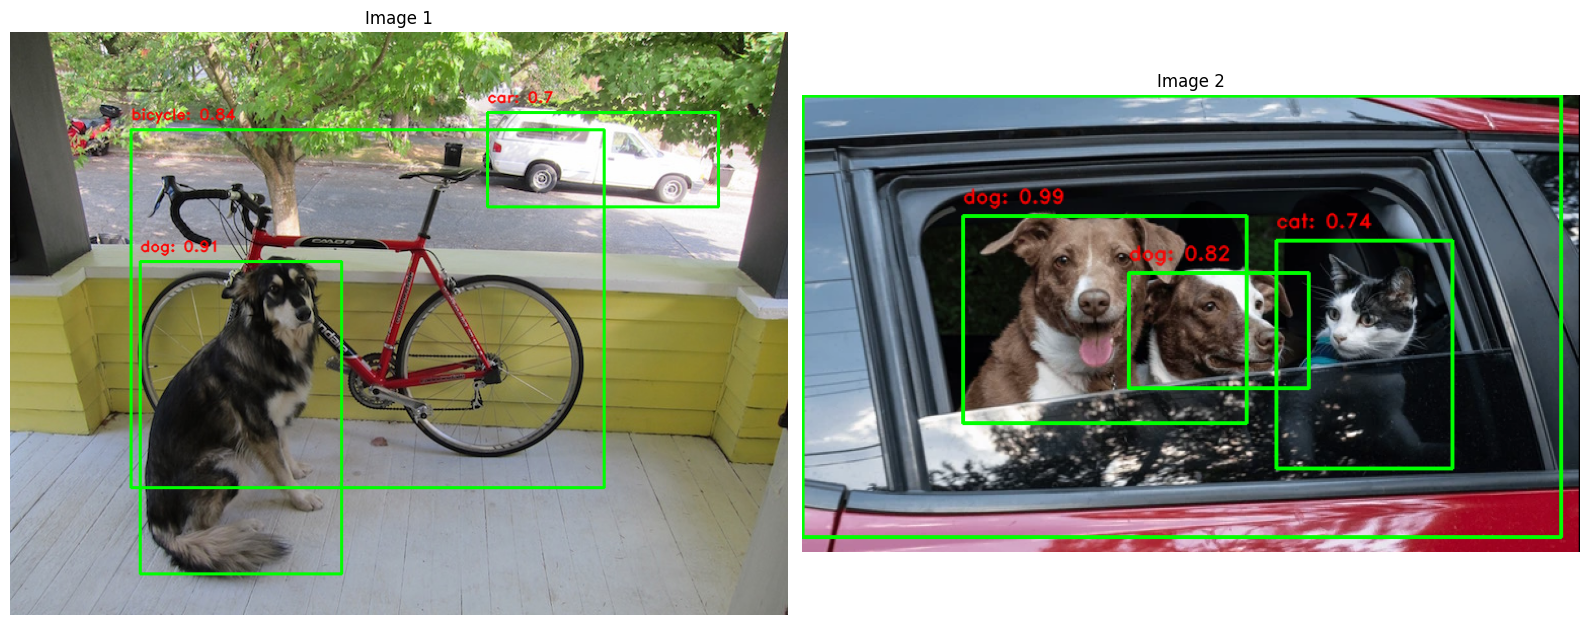

In [14]:
folder_path = "assets"

# Get a list of all image files in the folder
all_images = [os.path.join(folder_path, file) 
              for file in os.listdir(folder_path) 
              if file.endswith(('.jpg', '.jpeg', '.png'))]

# random images
selected_images = random.sample(all_images, 2)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for idx, image_path in enumerate(selected_images):
    # Read the image
    image = cv2.imread(image_path)
    print("Image ", idx +1)
    
    if image is None:
        print(f"Error reading {image_path}. Skipping...")
        continue

    height, width, _ = image.shape

    # object detection using YOLOv5
    blob = cv2.dnn.blobFromImage(image, swapRB=True, crop=False)
    net.setInput(blob)
    boxes = net.forward(["detection_out_final"])

    # extracts the object detection results 
    output = boxes[0].squeeze()

    font = cv2.FONT_HERSHEY_DUPLEX
    ig = image.copy()
    
    for i in range(output.shape[0]):
        conf = output[i, 2]

        
        #Confidence Threshold
        if conf > 0.6:
            x1n, y1n, x2n, y2n = output[i, 3:]
            
            x1 = int(x1n * width)
            y1 = int(y1n * height)
            x2 = int(x2n * width)
            y2 = int(y2n * height)
            print("Coordinates: ", x1, y1, x2, y2)
            
            
            # rectangle (image , tọa độ bên trái rec, tọa độ bên phải rec,  color , thickness)
            ig = cv2.rectangle(ig, (x1, y1), (x2, y2), (0, 255, 0), 2)
            class_name = label_names[int(output[i, 1])]
            print("Class: ", class_name)
            print()

            confidence = round(conf * 100 / 100, 2)
            
             # putText(image , text , tọa độ bên trái, font, fontScale, color , thickness , lineType)
            ig = cv2.putText(ig, f"{class_name}: {confidence}", (x1, y1 - 10), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

    # Display the image in the corresponding subplot
    axes[idx].imshow(cv2.cvtColor(ig, cv2.COLOR_BGR2RGB))
    axes[idx].axis('off') 
    axes[idx].set_title(f"Image {idx+1}", fontsize=12, color='black')  

plt.tight_layout()  
plt.show()

    